In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [3]:
# Define dataset paths
train_dir = "/content/drive/MyDrive/Week5/FruitinAmazon/train"
test_dir = "/content/drive/MyDrive/Week5/FruitinAmazon/test"



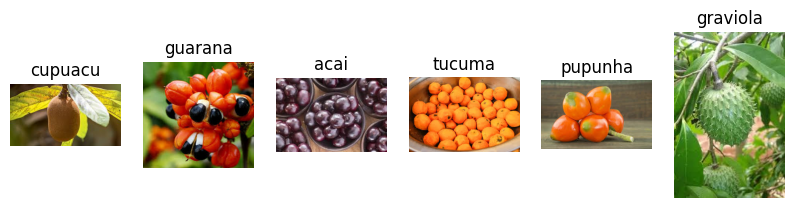

In [4]:
# Function to display sample images
def display_sample_images(directory, num_images=6):
    classes = os.listdir(directory)
    plt.figure(figsize=(10, 5))

    for i, class_name in enumerate(classes[:num_images]):
        class_dir = os.path.join(directory, class_name)
        image_name = random.choice(os.listdir(class_dir))
        img_path = os.path.join(class_dir, image_name)
        img = Image.open(img_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis("off")

    plt.show()

# Display sample images from training directory
display_sample_images(train_dir)



At first i obseverd that the images are in different sizes some are bigger and some are smaller. Some pictures are bright and some are dark.

In [5]:
def check_corrupted_images(directory):
    corrupted = []
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                img = Image.open(img_path)
                img.verify()
            except (IOError, SyntaxError):
                corrupted.append(img_path)
                os.remove(img_path)
    return corrupted

corrupted_images = check_corrupted_images(train_dir)
if corrupted_images:
    print("Removed corrupted images:", corrupted_images)
else:
    print("No corrupted images found.")

No corrupted images found.


In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
img_height, img_width = 128, 128
batch_size = 32
validation_split = 0.2
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123,
    color_mode='rgb'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123,
    color_mode='rgb'
)
class_names = train_ds.class_names
print("Class Names:", class_names)


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Class Names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", padding="same", strides=1, input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(32, (3, 3), activation="relu", padding="same", strides=1),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(6, activation="softmax")
])
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [10]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
    tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
]

history = model.fit(train_ds, validation_data=val_ds, epochs=250, batch_size=16, callbacks=callbacks)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 939ms/step - accuracy: 0.1655 - loss: 2.1188

3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.1623 - loss: 2.1592 - val_accuracy: 0.6667 - val_loss: 1.3328
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.1576 - loss: 1.9297 - val_accuracy: 0.0000e+00 - val_loss: 1.7957
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.3438 - loss: 1.6948 - val_accuracy: 0.0000e+00 - val_loss: 1.9192
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.2648 - loss: 1.5982 - val_accuracy: 0.0556 - val_loss: 1.8604
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.4045 - loss: 1.4538 - val_accuracy: 0.3889 - val_loss: 1.4256
Epoch 6/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4531 - loss: 1.2783 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.4349 - loss: 1.2652 - val_accuracy: 0.7222 - val_loss: 1.0341
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.6753 - loss: 1.0229 - val_accuracy: 0.7222 - val_loss: 1.0997
Epoch 8/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.7812 - loss: 0.8600

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.7726 - loss: 0.8522 - val_accuracy: 0.8333 - val_loss: 0.6750
Epoch 9/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8984 - loss: 0.5342

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.8451 - loss: 0.5844 - val_accuracy: 0.8333 - val_loss: 0.6225
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9271 - loss: 0.4288 - val_accuracy: 0.6667 - val_loss: 0.9641
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.8672 - loss: 0.4479 - val_accuracy: 0.7222 - val_loss: 0.8073
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9518 - loss: 0.2786 - val_accuracy: 0.7778 - val_loss: 0.7349
Epoch 13/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8750 - loss: 0.3265 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.8819 - loss: 0.3230 - val_accuracy: 0.8889 - val_loss: 0.3152
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9902 - loss: 0.1185

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9891 - loss: 0.1205 - val_accuracy: 0.9444 - val_loss: 0.2969
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.9891 - loss: 0.0936 - val_accuracy: 0.9444 - val_loss: 0.3763
Epoch 16/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 1.0000 - loss: 0.0924 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 1.0000 - loss: 0.0888 - val_accuracy: 0.9444 - val_loss: 0.2760
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9891 - loss: 0.0545 - val_accuracy: 0.8889 - val_loss: 0.3560
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 1.0000 - loss: 0.0342 - val_accuracy: 0.8333 - val_loss: 0.3652
Epoch 19/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 1.0000 - loss: 0.0320

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 1.0000 - loss: 0.0366 - val_accuracy: 0.9444 - val_loss: 0.2645
Epoch 20/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 1.0000 - loss: 0.0199

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 1.0000 - loss: 0.0196 - val_accuracy: 0.9444 - val_loss: 0.2193
Epoch 21/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 1.0000 - loss: 0.0080 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 0.8889 - val_loss: 0.1963
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.9444 - val_loss: 0.2521
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.8889 - val_loss: 0.2951
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 0.8889 - val_loss: 0.2986
Epoch 25/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.8889 - val_loss: 0.3001
Epoch 26/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.8889 - val_loss: 0.2788
Epoch 27/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 0.9444 - val_loss: 0.2831


In [11]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Validation Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8889 - loss: 0.1963
Test Accuracy: 0.8889
Validation Loss: 0.1963


In [12]:
model.save("AayushBahadurShahi_fruit.h5")
loaded_model= tf.keras.models.load_model("AayushBahadurShahi_fruit.h5")

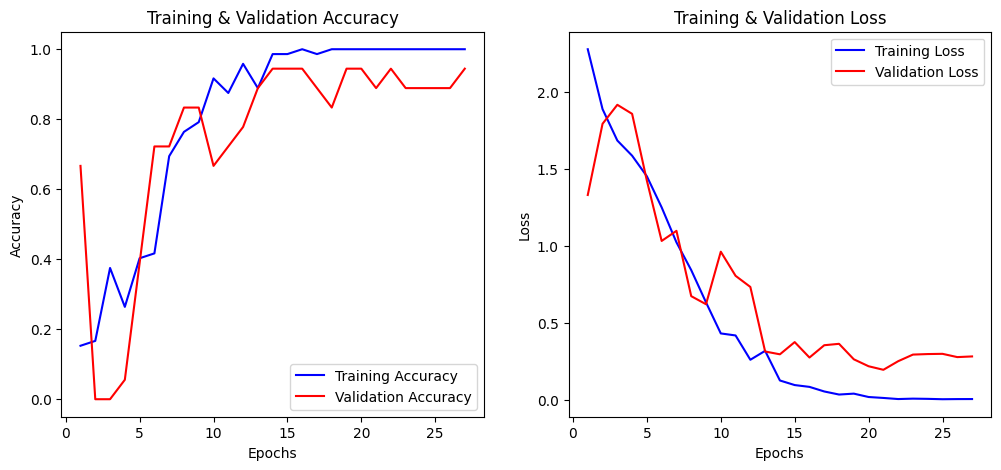

In [13]:
def plot_loss_accuracy(history):
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training & Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], 'b-', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training & Validation Loss')

    plt.show()

plot_loss_accuracy(history)

In [16]:
from sklearn.metrics import classification_report
def get_dataset_arrays(dataset):
    images, labels = [], []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels)

val_images, val_labels = get_dataset_arrays(val_ds)

pred_probs = model.predict(val_images)
pred_labels = np.argmax(pred_probs, axis=1)

unique_labels = np.unique(val_labels)

target_names = [class_names[i] for i in unique_labels]

report = classification_report(val_labels, pred_labels, target_names=target_names, labels=unique_labels)
print("Classification Report:\n", report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Classification Report:
               precision    recall  f1-score   support

     pupunha       1.00      0.67      0.80         3
      tucuma       1.00      0.93      0.97        15

   micro avg       1.00      0.89      0.94        18
   macro avg       1.00      0.80      0.88        18
weighted avg       1.00      0.89      0.94        18



In [17]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image_size = (128, 128)
class_names = sorted(os.listdir(test_dir))

test_images = []
test_labels = []

for label, class_name in enumerate(class_names):
    class_path = os.path.join(test_dir, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)

        image = load_img(image_path, target_size=image_size)
        image = img_to_array(image) / 255.0

        test_images.append(image)
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

test_labels_onehot = tf.keras.utils.to_categorical(test_labels, num_classes=len(class_names))

predictions = loaded_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels_onehot, axis=1)

report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Classification Report:
               precision    recall  f1-score   support

        acai       0.56      1.00      0.71         5
     cupuacu       0.83      1.00      0.91         5
    graviola       1.00      0.80      0.89         5
     guarana       0.80      0.80      0.80         5
     pupunha       1.00      0.80      0.89         5
      tucuma       1.00      0.40      0.57         5

    accuracy                           0.80        30
   macro avg       0.86      0.80      0.80        30
weighted avg       0.86      0.80      0.80        30

